In [9]:
import os
import sys

path = os.getcwd()
while os.path.basename(os.path.normpath(path)) != 'roman-pandeia':
    path = os.path.dirname(path)
repo_path = path
if repo_path not in sys.path:
    sys.path.append(repo_path)

In [10]:
import numpy as np
import time

from pprint import pprint
from tqdm import tqdm

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['axes.grid'] = False
matplotlib.rcParams['image.origin'] = 'lower'

from pandeia.engine.perform_calculation import perform_calculation
from pandeia.engine.calc_utils import build_default_calc, build_default_source
from lenstronomy.Util import data_util
from lenstronomy.SimulationAPI.ObservationConfig.Roman import Roman

from package.helpers import test_physical_lens
from package.pandeia import pandeia_input
from package.plots import diagnostic_plot, plot

In [11]:
figure_dir = os.path.join(repo_path, 'figures')
array_dir = os.path.join(repo_path, 'output', 'arrays')

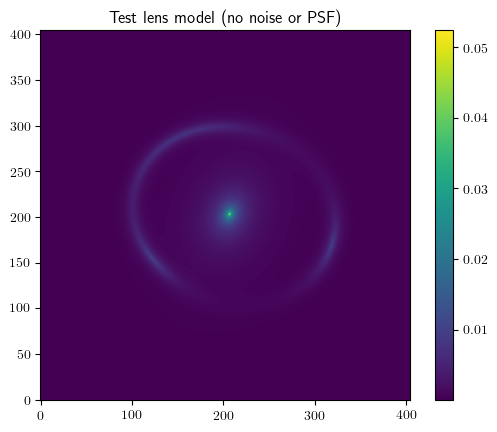

In [12]:
oversample_factor = 9

physical_lens = test_physical_lens.TestPhysicalLens()
model = physical_lens.get_array(num_pix=45 * oversample_factor)

plot.plot(filepath=None,
          title='Test lens model (no noise or PSF)',
          array=model,
          colorbar=True)

In [13]:
calc = pandeia_input.build_pandeia_calc(array=model, 
                                        lens=physical_lens, 
                                        band='f106', 
                                        oversample_factor=oversample_factor)

100%|██████████| 405/405 [00:00<00:00, 1470.05it/s]


Converting (405, 405) array to point sources...


  0%|          | 0/405 [00:00<?, ?it/s]

100%|██████████| 405/405 [18:26<00:00,  2.73s/it]

Point source conversion complete: 164025 point sources


In [14]:
# turn background off. options include 'none', 'minzodi' (default), and 'ecliptic'
calc['background'] = 'none'

In [15]:
# turn all noise and effects off
calculation_dict = pandeia_input.get_calculation_dict(init=False)

calc['calculation'] = calculation_dict

In [16]:
detector_no_noise_or_background, execution_time = pandeia_input.get_pandeia_image(calc)
print(f'Execution time: {execution_time}')


Performing Pandeia calculation...


/data/bwedig/.conda/envs/pandeia/lib/python3.9/site-packages/pandeia/engine/report.py:1012: RuntimeWarning: divide by zero encountered in log
  if np.log(abs(val)) < -1*precision and val != 0.0:


Pandeia calculation complete
Execution time: 4:32:53


In [17]:
np.save(os.path.join(array_dir, f'detector_no_noise_or_background_{oversample_factor}'), detector_no_noise_or_background)

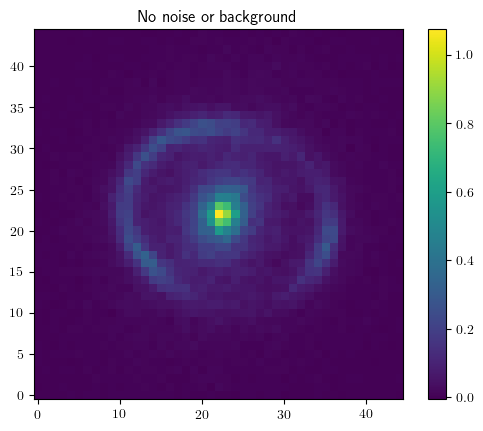

In [18]:
plot.plot(filepath=None, 
          title='No noise or background', 
          array=detector_no_noise_or_background,
          colorbar=True)